<a href="https://colab.research.google.com/github/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/blob/main/Multiple_Linear_Regression_Group_Project_car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Plan**

Load data

Split dataset into training and test dataset, use training dataset to create the model.

Display sample data and summary


Calculate normality p-value

Calculate lineral regression model and display values

Display regression summary

Display scatterplot again with calculated regression line

Compare actual and predicted values to determine accuracy of the linear regression equation

Observe residuals data in graphical form to draw conclusions


Normality in Mulitiple Linear Regression
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/normality/


In [4]:
#Read this csv file from GitHub into Jupyter Notebook.
dataset = pd.read_csv(r"https://raw.githubusercontent.com/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/main/CarPrice_Assignment.csv")

In [5]:
#Make a copy and populate with training data
datasettraining = dataset.copy()
datasettest = dataset.copy()

#Take a random sample of 75% of the data for training (and put them into order and renumber to eliminate missing index values)
datasettraining = datasettraining.sample(frac = .75).sort_index().reset_index(drop=True)

#Get remaining 25% of data rows from dataset (remove all rows from dataset that aren't already in datasettraining)
datasettest = (pd.merge(dataset, datasettraining, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)).sort_index().reset_index(drop=True)

In [6]:
#Check training data head
datasettraining.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
1,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
2,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
3,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
4,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


In [7]:
#Summary of all fields
datasettraining.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,102.389610,0.961039,98.270779,173.046753,65.791558,53.604545,2524.785714,125.610390,3.323636,3.269156,10.139740,104.071429,5147.077922,25.409091,30.987013,13082.269481
std,57.867136,1.230777,5.778730,12.168180,2.104957,2.373887,506.076668,40.405026,0.277912,0.292227,3.980604,39.453805,484.674846,6.709289,6.931021,8189.163080
min,2.000000,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,14.000000,16.000000,5118.000000
25%,55.250000,0.000000,94.500000,166.425000,64.000000,51.700000,2145.000000,97.000000,3.135000,3.127500,8.600000,70.000000,4800.000000,19.000000,25.000000,7790.750000
50%,100.500000,1.000000,96.500000,172.400000,65.500000,53.800000,2403.000000,110.000000,3.310000,3.290000,9.000000,97.000000,5200.000000,24.500000,30.000000,9988.500000
75%,152.750000,2.000000,100.400000,177.800000,66.500000,55.500000,2841.250000,144.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.750000,36.000000,15994.750000
max,204.000000,3.000000,120.900000,208.100000,72.300000,59.100000,4066.000000,308.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
#Summary of all fields
datasettest.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,104.843137,0.450980,100.223529,177.076471,66.258824,54.088235,2648.509804,130.823529,3.348235,3.213922,10.150980,104.254902,5058.823529,24.647059,30.039216,13863.846412
std,64.084748,1.221699,6.545337,12.469604,2.247236,2.633906,557.389572,45.372990,0.249982,0.370929,3.985492,40.209871,451.077142,6.035971,6.767454,7396.877597
min,1.000000,-2.000000,88.600000,155.900000,62.500000,47.800000,1874.000000,90.000000,2.910000,2.190000,7.000000,52.000000,4150.000000,13.000000,17.000000,5195.000000
25%,47.500000,0.000000,95.700000,166.900000,64.400000,52.500000,2197.000000,98.000000,3.150000,3.070000,8.550000,70.000000,4800.000000,19.000000,25.000000,8006.500000
50%,111.000000,0.000000,98.800000,175.400000,66.300000,54.500000,2579.000000,121.000000,3.350000,3.230000,9.000000,92.000000,5000.000000,24.000000,30.000000,11694.000000
75%,159.000000,1.000000,103.900000,187.750000,67.900000,55.700000,3049.000000,141.000000,3.560000,3.400000,9.400000,117.500000,5450.000000,29.500000,34.000000,17904.583500
max,205.000000,3.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,326.000000,3.780000,4.170000,23.000000,262.000000,6000.000000,38.000000,47.000000,36000.000000


In [9]:
#Set Variable Choices
#MultiVarChoices = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
#Set Variable Choices
MultiVarChoices = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',                      'horsepower', 'peakrpm', 'citympg', 'highwaympg']

response = 'price'

#Create Linear Regression object
model = LinearRegression()

#Fit the dataset
model.fit(datasettraining[MultiVarChoices], datasettraining[response])

LinearRegression()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f693d61da10>,
      dtype=object)

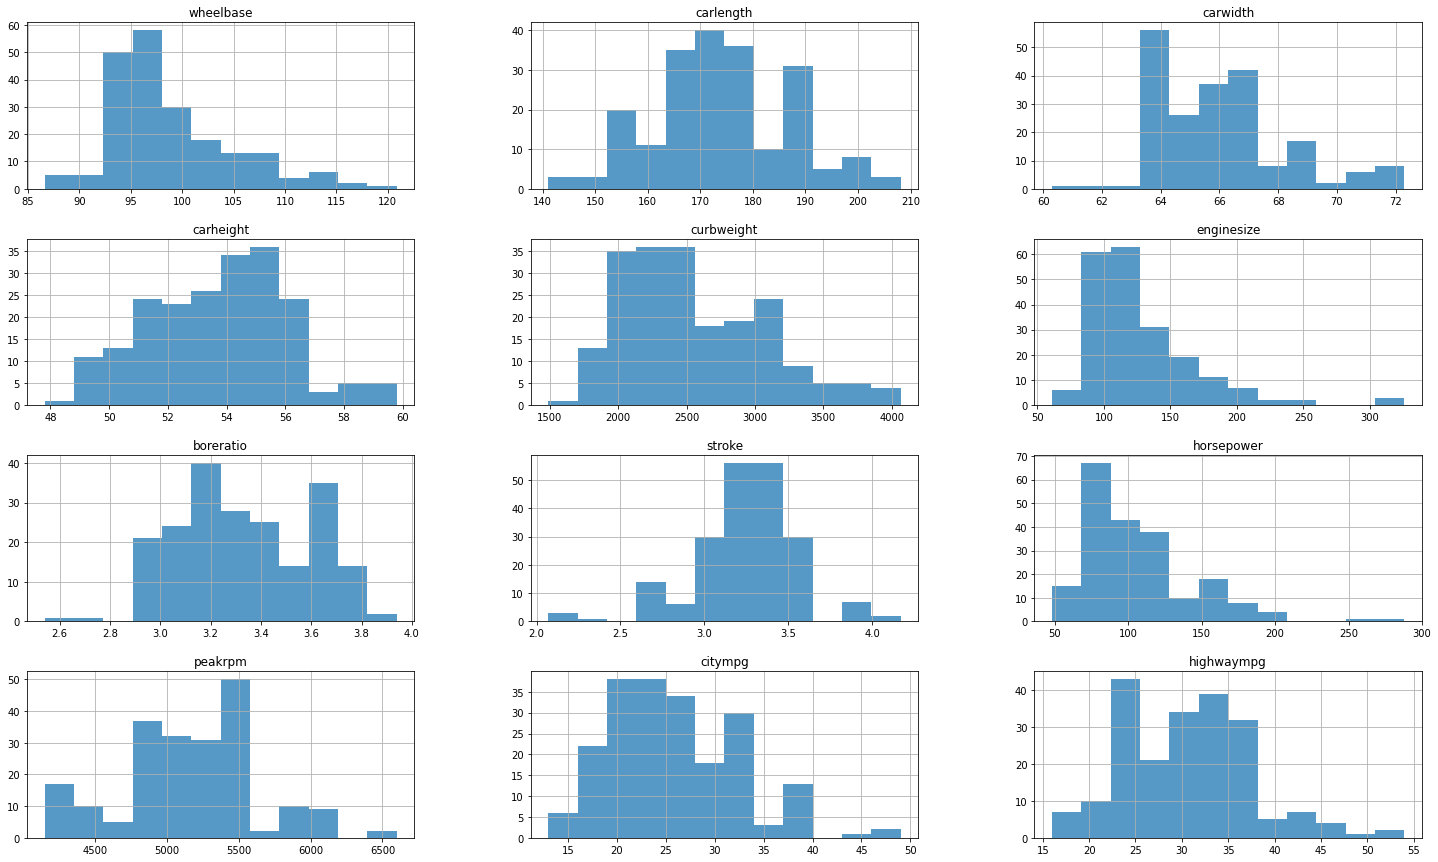

In [10]:
#getonly fields included in model
plots = dataset[MultiVarChoices]

#Display histograms for fields in model
#Set size of histogram
f, ax = plt.subplots(1, 1, figsize = (25, 15))

#Display histogram
plots.hist(bins=12, alpha=0.75, ax=ax)

In [11]:
#Gernate list of predictions from test data
predictions = model.predict(datasettest[MultiVarChoices])  

#Check test data head
datasettest.head() 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
2,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167
3,13,0,bmw x1,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970.000
4,15,1,bmw z4,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565.000


In [12]:
#Sample data output
print('Actual'.ljust(14), 'Predicted'.ljust(14))
print(response.ljust(14), response.ljust(14))

for i in [0,1,2,3,4,45,46,47,48,49]:
    print(str(datasettest[response][i]).ljust(14), str(predictions[i]).ljust(14))

Actual         Predicted     
price          price         
13495.0        13159.330795362112
18920.0        19307.479091111585
17859.167      18304.66633642082
20970.0        16244.261297868565
24565.0        17690.798071196245
12290.0        11567.260516037917
16515.0        18197.800815799434
18420.0        16502.308331309105
16845.0        19253.488749833545
21485.0        25184.674103801313


In [13]:
#Check accuracy of model (Coefficient of Determination)
r_sq = model.score(datasettraining[MultiVarChoices], datasettraining[response])
print('Coefficient of Determination:', r_sq)

Coefficient of Determination: 0.8415803541577412


In [14]:
#Get the Y-intercept value
salIntercept = model.intercept_

#Get the Coefficents for the formula.
salCoef = model.coef_

#Output formula variables for regression analysis.
print('Intercept:', salIntercept,'\n')

print("Coefficients:")
list(zip(datasettraining[MultiVarChoices], salCoef))

Intercept: -59148.87888383656 

Coefficients:


[('wheelbase', 98.06450388361475),
 ('carlength', -114.08061094659004),
 ('carwidth', 633.6823943477826),
 ('carheight', 114.21806205168123),
 ('curbweight', 5.0945150530514525),
 ('enginesize', 128.83807307104757),
 ('boreratio', -1020.8379936041707),
 ('stroke', -3708.6969073857986),
 ('horsepower', 18.521115178969165),
 ('peakrpm', 2.9992556381404682),
 ('citympg', -194.66072387951766),
 ('highwaympg', 276.7116214137398)]

In [21]:
#Assemble fields for model
mmfields = response + ' ~ ' + ' + '.join(MultiVarChoices)

# fit multi linear regression model
multi_model = ols(mmfields, data=datasettraining).fit()

# display model summary
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     62.42
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           2.95e-50
Time:                        15:57:48   Log-Likelihood:                -1463.8
No. Observations:                 154   AIC:                             2954.
Df Residuals:                     141   BIC:                             2993.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.915e+04   1.89e+04     -3.128      0.0

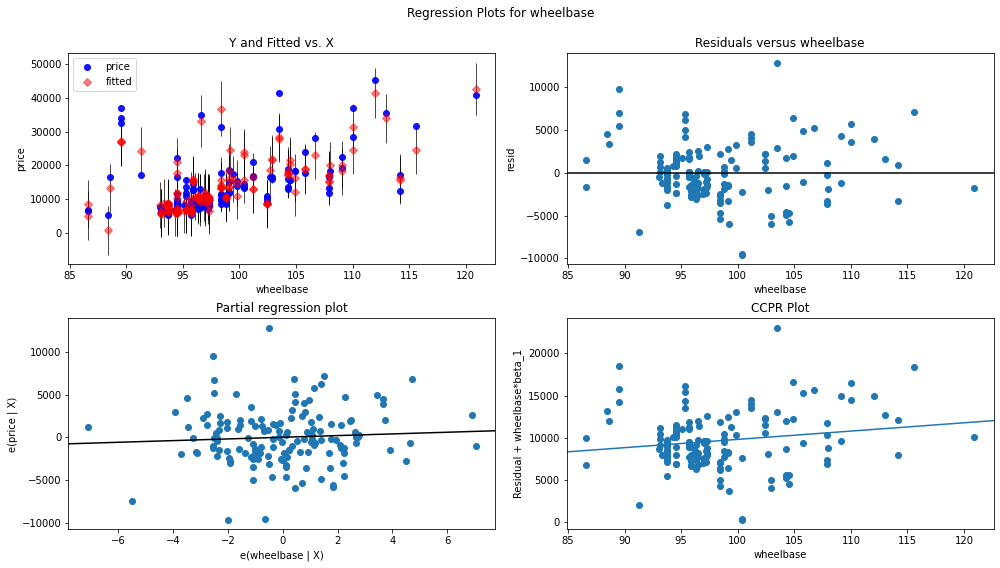

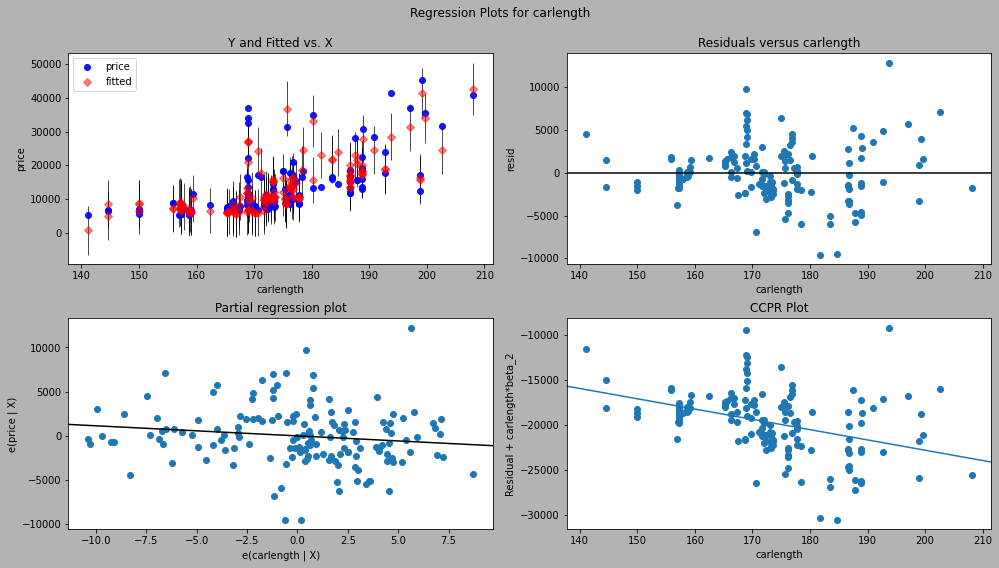

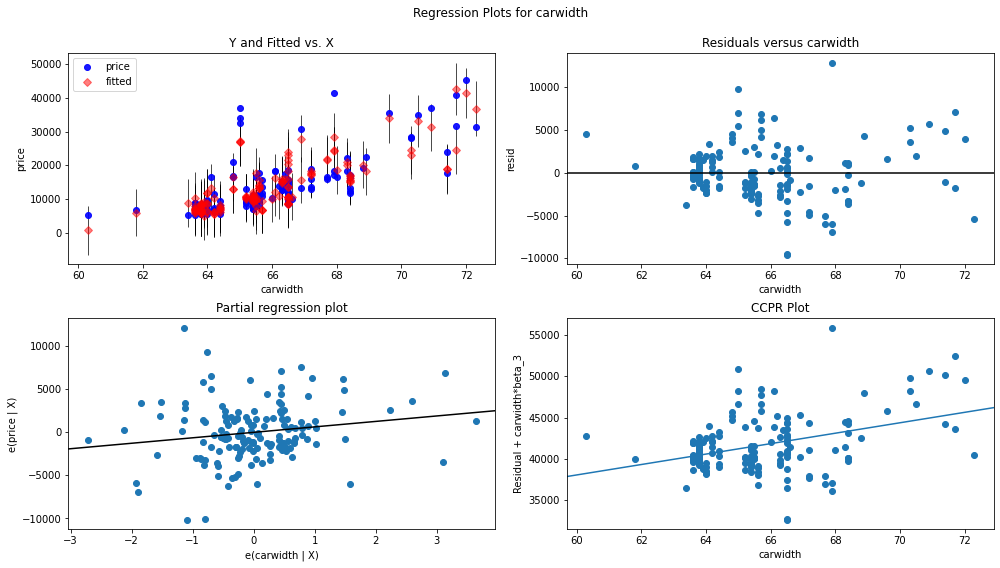

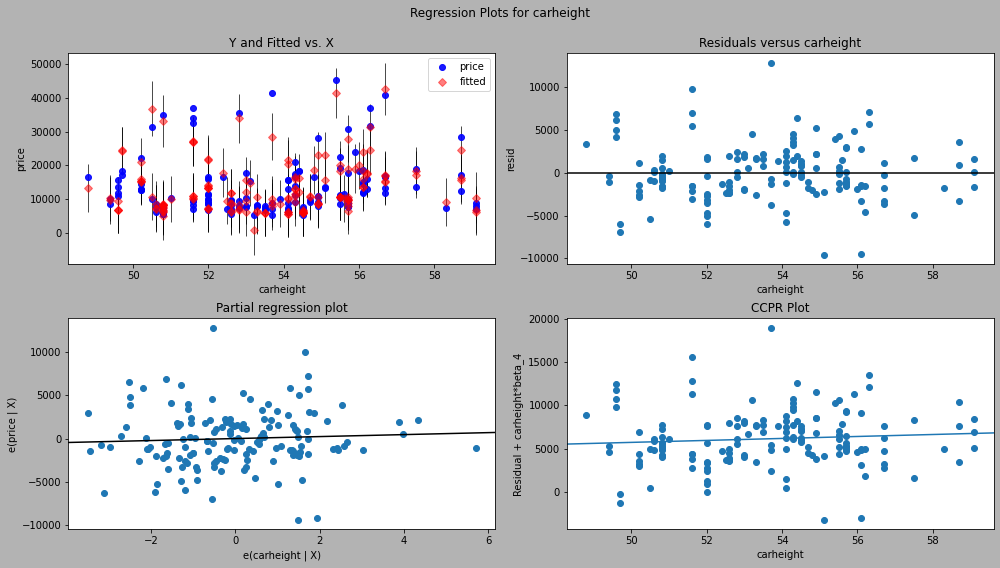

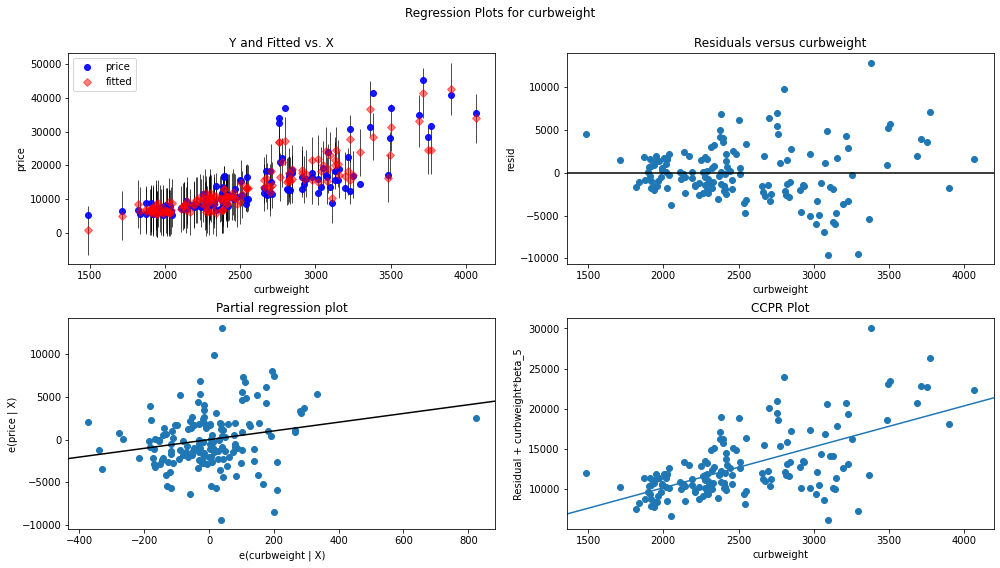

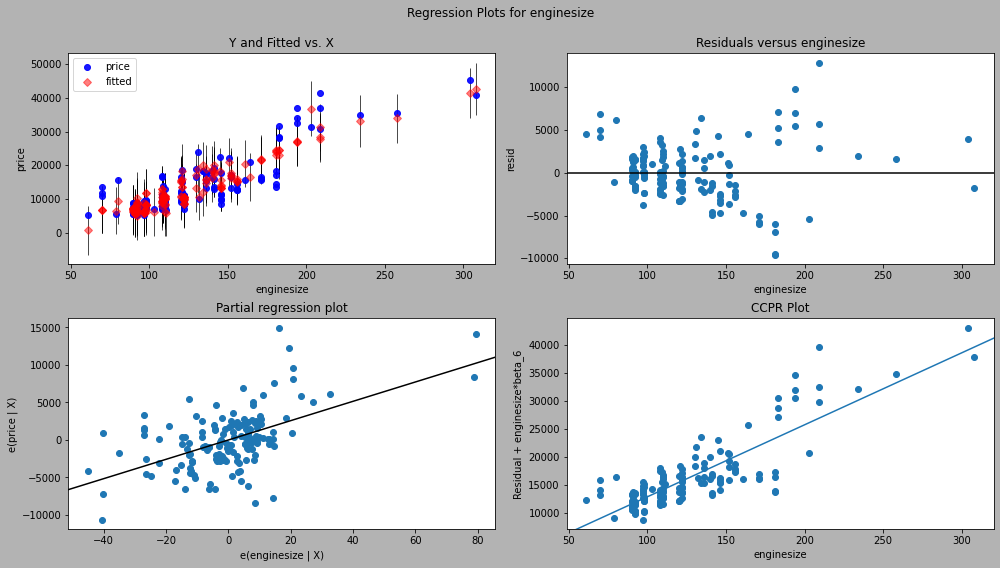

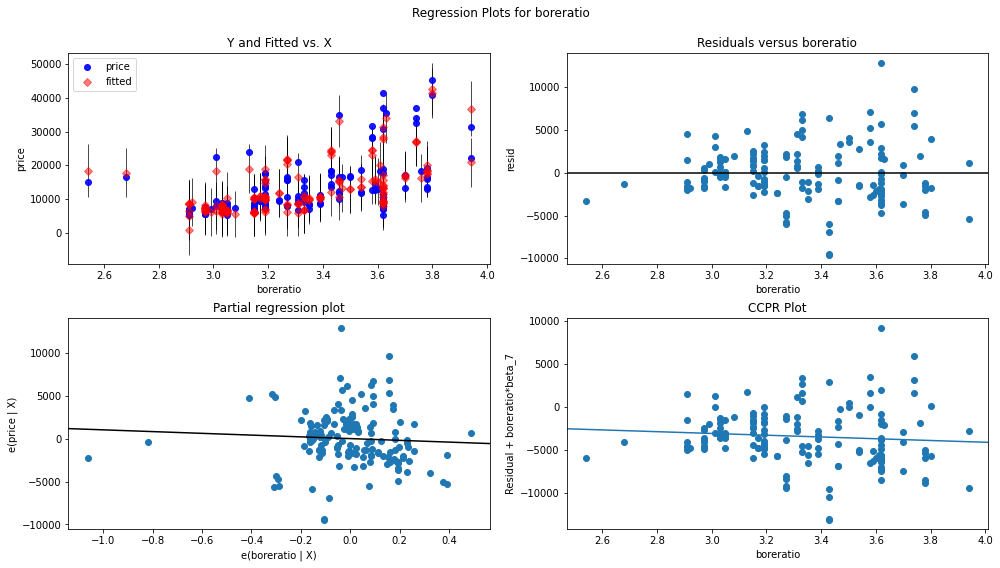

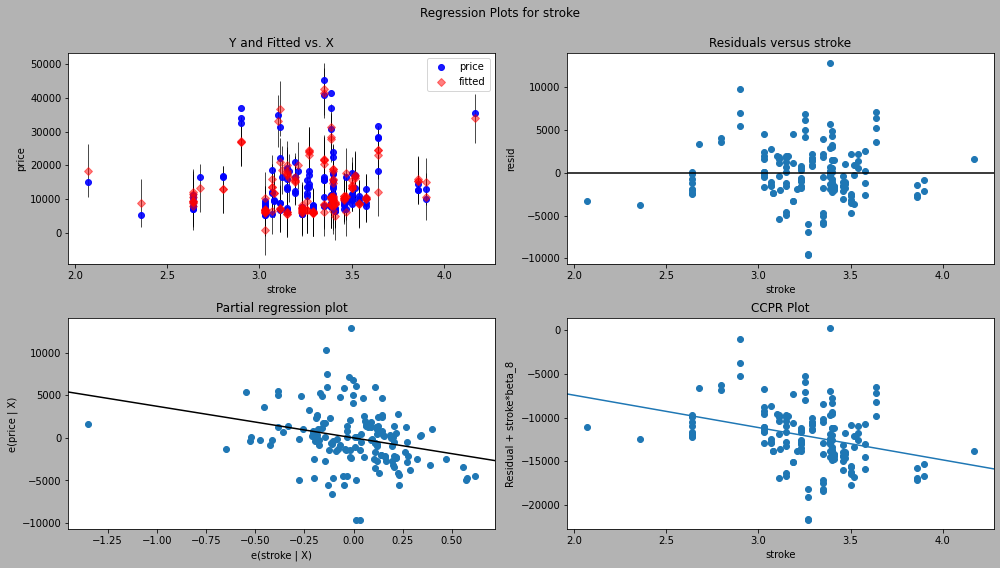

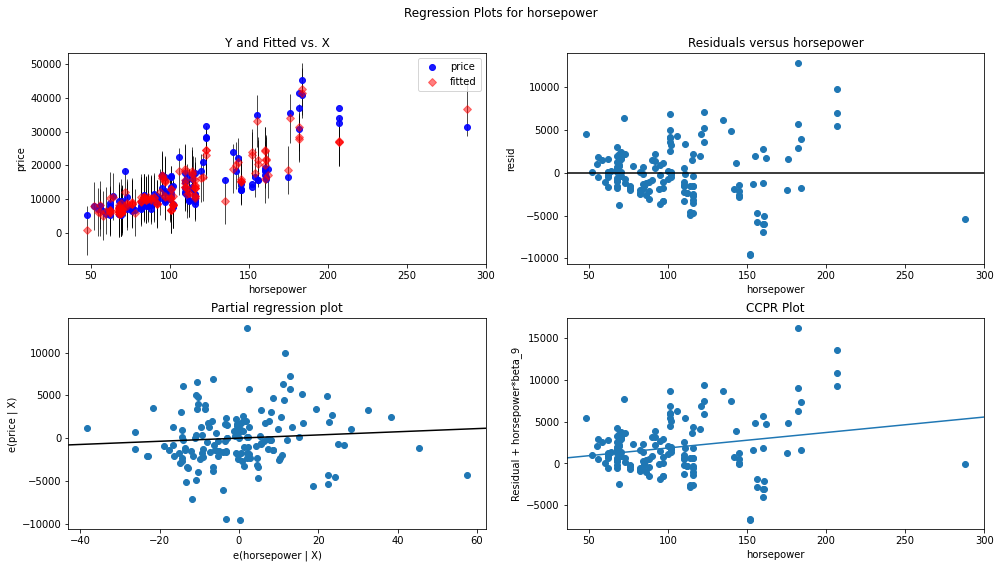

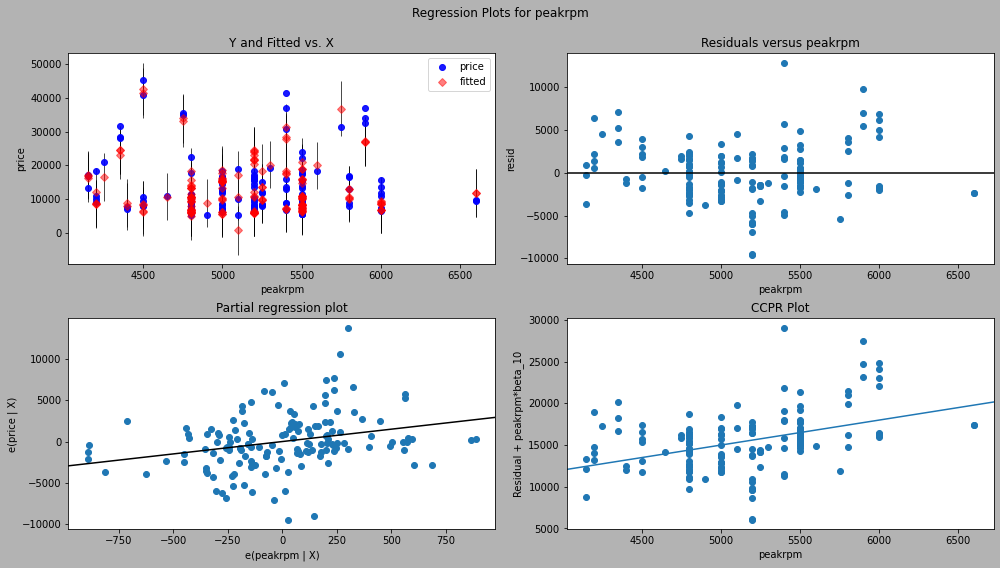

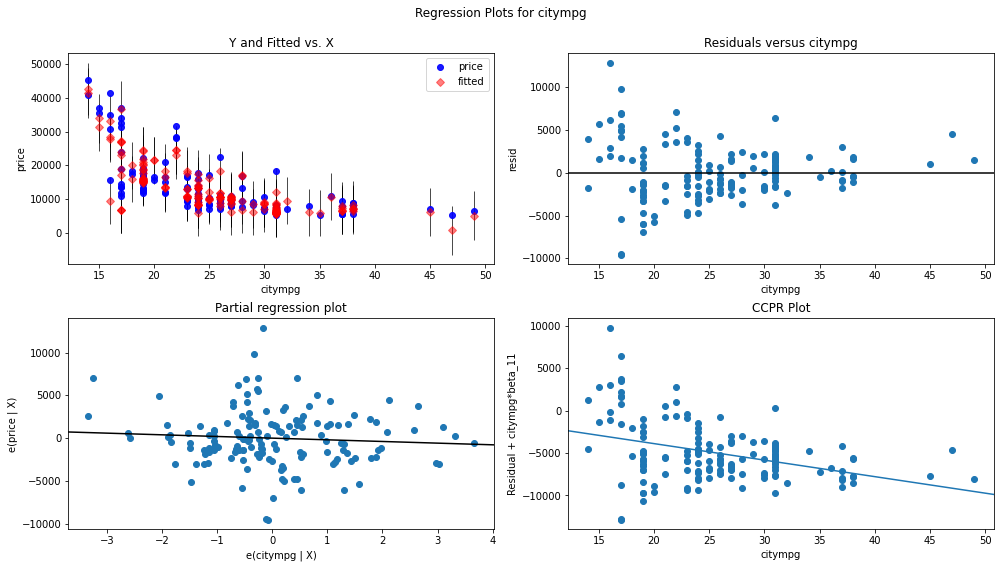

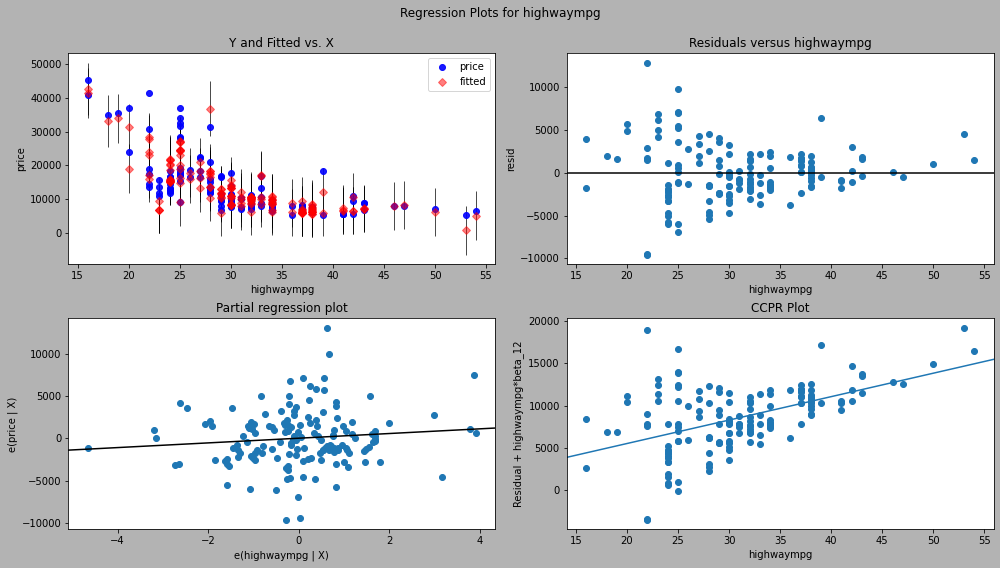

In [39]:
#Set background color
facecolor = '0.7'
for i in range(0,len(MultiVarChoices)):
  #Alternate background color so it's easier to see separate graphs for the different residuals
  if (facecolor == '0.7'):
    facecolor = '1'
  else:
    facecolor = '0.7'
  #Fresh figure so graphs don't all stack together
  fig = None
  # modify figure size
  fig = plt.figure(figsize=(14, 8))
  fig.patch.set_facecolor(facecolor)
  #Creating regression plots
  fig = sm.graphics.plot_regress_exog(multi_model, MultiVarChoices[i],fig=fig)
  fig.show()